## Importing Libraries


In [73]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Load Dataset

In [5]:
df = pd.read_csv('Spam Email Detection - spam.csv')

## Data Cleaning

In [6]:
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [7]:
data = df.where((pd.notnull(df)), '')

In [8]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,
5,spam,FreeMsg Hey there darling it's been 3 week's n...,,,
6,ham,Even my brother is not like to speak with me. ...,,,
7,ham,As per your request 'Melle Melle (Oru Minnamin...,,,
8,spam,WINNER!! As a valued network customer you have...,,,
9,spam,Had your mobile 11 months or more? U R entitle...,,,


In [10]:
data.shape

(5572, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  5572 non-null   object
 3   Unnamed: 3  5572 non-null   object
 4   Unnamed: 4  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
# drop last 3 cols
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
# renaming the cols
data.rename(columns={'v1':'Category','v2':'Message'},inplace=True)
data.sample(5)

,Category,Message
2339,ham,Cheers for the message Zogtorius. I��ve been s...
3369,ham,Most of the tiime when i don't let you hug me ...
3346,ham,No problem baby. Is this is a good time to tal...
4480,ham,No..its ful of song lyrics..
5291,ham,Xy trying smth now. U eat already? We havent...


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


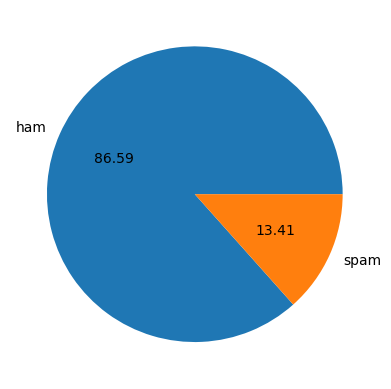

In [41]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
data.loc[data['Category']=='spam','Category',]=0
data.loc[data['Category']=='ham','Category',]=1

In [20]:
X = data['Message']
Y = data['Category']


In [21]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [23]:
X_train , X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state = 3)

In [24]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [26]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [30]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [31]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [32]:
print(X_train_features)

  (0, 742)	0.32207229533730536
  (0, 3962)	0.2411608243124387
  (0, 4279)	0.3893042361045832
  (0, 6580)	0.20305518394534605
  (0, 3375)	0.32207229533730536
  (0, 2116)	0.38519642807943744
  (0, 3126)	0.4403035234544808
  (0, 3251)	0.258880502955985
  (0, 3369)	0.21816477736422235
  (0, 4497)	0.2910887633154199
  (1, 4045)	0.380431198316959
  (1, 6850)	0.4306015894277422
  (1, 6397)	0.4769136859540388
  (1, 6422)	0.5652509076654626
  (1, 7420)	0.35056971070320353
  (2, 934)	0.4917598465723273
  (2, 2103)	0.42972812260098503
  (2, 3899)	0.40088501350982736
  (2, 2220)	0.413484525934624
  (2, 5806)	0.4917598465723273
  (3, 6121)	0.4903863168693604
  (3, 1595)	0.5927091854194291
  (3, 1838)	0.3708680641487708
  (3, 7430)	0.5202633571003087
  (4, 2523)	0.7419319091456392
  :	:
  (4452, 2116)	0.3092200696489299
  (4453, 1000)	0.6760129013031282
  (4453, 7250)	0.5787739591782677
  (4453, 1758)	0.45610005640082985
  (4454, 3019)	0.42618909997886
  (4454, 2080)	0.3809693742808703
  (4454, 3078

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [37]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [38]:
print('Acc on training data:',accuracy_on_training_data)

Acc on training data: 0.9661207089970832


In [39]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [40]:
print('Acc on test data:',accuracy_on_test_data)

Acc on test data: 0.9623318385650225


In [42]:

import nltk

In [43]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [56]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anisha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
data['num_characters'] = df['Message'].apply(len)

In [48]:
data.head()

,Category,Message,num_characters
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,1,U dun say so early hor... U c already then say...,49
4,1,"Nah I don't think he goes to usf, he lives aro...",61


In [49]:
data['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [50]:
data.head()

,Category,Message,num_characters,num_sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,2
1,1,Ok lar... Joking wif u oni...,29,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,1,U dun say so early hor... U c already then say...,49,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,1


In [53]:
data[['num_characters','num_sentences']].describe()

,num_characters,num_sentences
count,5572.000000,5572.000000
mean,80.031945,1.997846
std,59.622618,1.522285
min,2.000000,1.000000
25%,35.000000,1.000000
50%,61.000000,2.000000
75%,121.000000,2.000000
max,910.000000,38.000000


## Data Preprocessing

In [54]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [60]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Join the words back into a single string
    transformed_text = ' '.join(filtered_words)
    
    return transformed_text

# Example usage
sample_text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."
transformed_sample_text = transform_text(sample_text)
print(transformed_sample_text)


im gon na home soon dont want talk stuff anymore tonight k ive cried enough today


In [63]:
data['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [64]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [66]:
data['transformed_text'] = data['Message'].apply(transform_text)

In [67]:
df.head()

,Category,Message,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",2
1,ham,Ok lar... Joking wif u oni...,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [70]:
!pip install wordcloud nltk matplotlib
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -------------------------------- ------- 245.8/300.2 kB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 4.6 MB/s eta 0:00:00


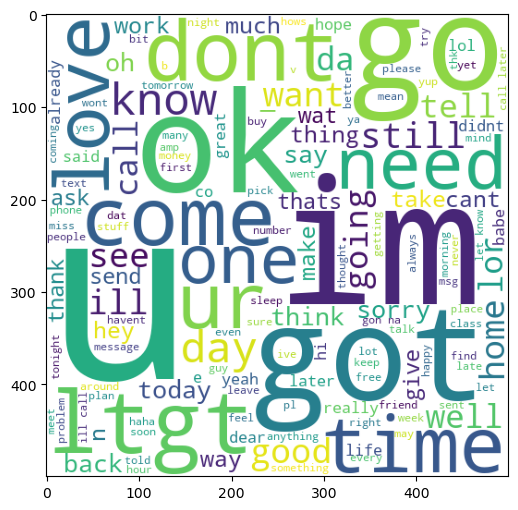

In [75]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['Category'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(spam_wc)

In [76]:
spam_corpus = []
for msg in data[data['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [77]:
len(spam_corpus)

39848

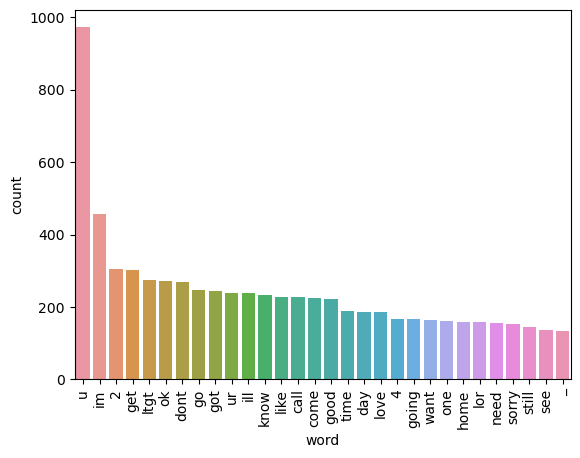

In [79]:
from collections import Counter
most_common_words = Counter(spam_corpus).most_common(30)

df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

In [81]:
ham_corpus = []
for msg in data[data['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [82]:
len(ham_corpus)

12513

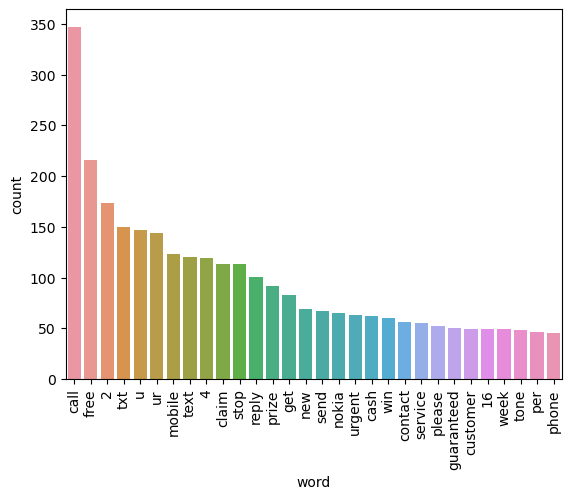

In [83]:
most_common_words = Counter(ham_corpus).most_common(30)

df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

## Model Building


In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [85]:
x = tfidf.fit_transform(data['transformed_text']).toarray()

In [86]:
y = data['Category'].values

In [87]:
print(x.shape)
print(y.shape)

(5572, 3000)
(5572,)


In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [89]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svcc = SVC(kernel='sigmoid', gamma=1.0)
knnc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)

In [90]:
clfs = {
    'SVC' : svcc,
    'KNN' : knnc,
    'DT': dtc, 
    'LR': lrc, 
}

In [91]:

def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [97]:
svcc = SVC(kernel='linear')
train_classifier(svcc, X_train_features, Y_train, X_test_features, Y_test)


(0.9838565022421525, 0.9825819672131147)

In [103]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
        current_accuracy, current_precision = train_classifier(clf, X_train_features, Y_train, X_test_features, Y_test)
        
        print(f"For {name}")
        print(f"Accuracy - {current_accuracy}")
        print(f"Precision - {current_precision}")
        
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)

For SVC
Accuracy - 0.9820627802690582
Precision - 0.9805725971370143
For KNN
Accuracy - 0.905829596412556
Precision - 0.9014084507042254
For DT
Accuracy - 0.9336322869955157
Precision - 0.9309338521400778
For LR
Accuracy - 0.9614349775784753
Precision - 0.9626639757820383


In [104]:
performance_df = pd.DataFrame({
    'Classifier': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)
print(performance_df)

  Classifier  Accuracy  Precision
0        SVC  0.982063   0.980573
3         LR  0.961435   0.962664
2         DT  0.933632   0.930934
1        KNN  0.905830   0.901408


In [105]:
performance_df1 = pd.melt(performance_df,id_vars='Classifier')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


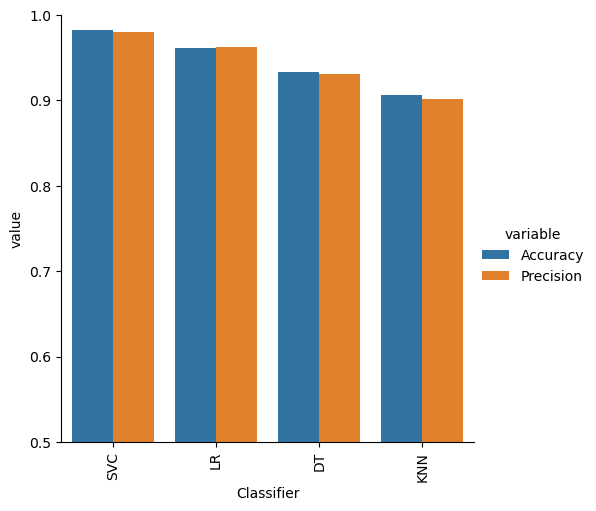

In [106]:
sns.catplot(x = 'Classifier', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

In [108]:
def preprocess_and_transform(texts):
    transformed_texts = [transform_text(text) for text in texts]
    text_features = tfidf.transform(transformed_texts).toarray()
    
    return text_features

# New emails for prediction
emails = [
    "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now.",
    "Hey, are we still on for the meeting tomorrow?",
    "You have one more step to confirm your subscription to our newsletter.",
    "Reminder: Your bill payment is due tomorrow.",
    "Special offer just for you! Get 50% off on all items. Hurry, limited time only!"
]

# Transform and predict
features = preprocess_and_transform(emails)
predictions = clf.predict(features)

# Map predictions to labels
predictions_labels = ['spam' if label == 1 else 'ham' for label in predictions]

# Print predictions
for email, label in zip(emails, predictions_labels):
    print(f"Email: {email}\nPrediction: {label}\n")


Email: Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now.
Prediction: spam

Email: Hey, are we still on for the meeting tomorrow?
Prediction: spam

Email: You have one more step to confirm your subscription to our newsletter.
Prediction: spam

Email: Reminder: Your bill payment is due tomorrow.
Prediction: spam

Email: Special offer just for you! Get 50% off on all items. Hurry, limited time only!
Prediction: spam

